### Importation des bibliothèques et des modules
Nous utiliserons ces modules pour nous aider à manipuler les données et à visualiser les caractéristiques ainsi qu'à mesurer la performance de notre modèle. Numpy et Pandas sont utiles pour manipuler les jeux de donnée, ses colonnes et cellules. Nous utiliserons matplotlib avec Seaborn pour visualiser nos données.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("data"))

['2015-building-energy-benchmarking.csv', '2016-building-energy-benchmarking.csv', 'socrata_metadata_2015-building-energy-benchmarking.json', 'socrata_metadata_2016-building-energy-benchmarking.json']


In [2]:
raw_2015 = pd.read_csv("data/2015-building-energy-benchmarking.csv")
data_2015 = raw_2015.copy()
raw_2016 = pd.read_csv("data/2016-building-energy-benchmarking.csv")
data_2016 = raw_2016.copy()

In [3]:
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
data_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


### Premier tri fonctionnel

In [5]:
def difference_columns(df1, df2):
    print(df1.columns.difference(df2.columns))
    print(df2.columns.difference(df1.columns))

In [6]:
difference_columns(data_2015, data_2016)

Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Location', 'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'],
      dtype='object')
Index(['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude',
       'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode'],
      dtype='object')


In [7]:
data_2015.rename(columns={"Zip Codes": "ZipCode", 
                          "Comment": "Comments", 
                          "GHGEmissionsIntensity(kgCO2e/ft2)": "GHGEmissionsIntensity",
                          "GHGEmissions(MetricTonsCO2e)": "TotalGHGEmissions",
                         }, inplace=True)
difference_columns(data_2015, data_2016)

Index(['2010 Census Tracts', 'City Council Districts', 'Location',
       'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas'],
      dtype='object')
Index(['Address', 'City', 'Latitude', 'Longitude', 'State'], dtype='object')


In [8]:
longitude, latitude, address, city, state, zipcode = [], [], [], [], [], []
for location in data_2015["Location"]:
    location_dict = eval(location)
    longitude.append(location_dict["longitude"])
    latitude.append(location_dict["latitude"])
    human_address_dict = eval(location_dict["human_address"])
    address.append(human_address_dict['address'])
    city.append(human_address_dict['city'])
    state.append(human_address_dict['state'])
    zipcode.append(human_address_dict['zip'])
data_2015['Longitude'] = longitude
data_2015['Latitude'] = latitude
data_2015['Address'] = address
data_2015['City'] = city
data_2015['State'] = state
data_2015['ZipCode'] = zipcode

In [9]:
data_2015.drop(columns=['Location'], inplace=True)

In [10]:
difference_columns(data_2015, data_2016)

Index(['2010 Census Tracts', 'City Council Districts', 'OtherFuelUse(kBtu)',
       'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas'],
      dtype='object')
Index([], dtype='object')


### Concaténation des datasets

In [11]:
data = pd.concat([data_2015, data_2016], ignore_index=True)

### Gestion des doublons

In [12]:
print(data.duplicated().sum())
data = data.drop_duplicates()

0


### Gestion des valeurs manquantes

In [13]:
def null_table(dataframe):
    print("Data Frame")
    print(pd.isnull(dataframe).sum()[pd.isnull(dataframe).sum() != 0])

In [14]:
null_table(data)

Data Frame
2010 Census Tracts                                               6492
City Council Districts                                           6503
Comments                                                         6703
DefaultData                                                         1
ENERGYSTARScore                                                  1623
Electricity(kBtu)                                                  19
Electricity(kWh)                                                   19
GHGEmissionsIntensity                                              19
LargestPropertyUseType                                            156
LargestPropertyUseTypeGFA                                         156
ListOfAllPropertyUseTypes                                         136
NaturalGas(kBtu)                                                   19
NaturalGas(therms)                                                 19
NumberofBuildings                                                   8
NumberofF

In [15]:
def rotate_labels(axes):
    for item in axes.get_xticklabels():
        item.set_rotation(90)

def missing_values_graph(missing_group):
    percent_of_nans = missing_group['percent_of_nans']
    low_nans = missing_group['low_nans']
    middle_nans = missing_group['middle_nans']
    high_nans = missing_group['high_nans']
    zero_nan_features = missing_group['zero_nan_features']
    useless_features = missing_group['useless_features']
        
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    
    sns.distplot(percent_of_nans, bins=100, kde=False, ax=axs[0, 0])
    axs[0, 0].set(title="Pourcentage de valeur NaN par caractéristiques", xlabel="% de NaN", ylabel="Nombre de caractéristiques")
    
    lows = sns.barplot(x=low_nans.index.values, y=low_nans.values, palette="Greens", ax=axs[0, 1])
    rotate_labels(lows)
    axs[0, 1].set(ylabel="% de NaN", title="Taux faible de NaN")
    
    middle = sns.barplot(x=middle_nans.index.values, y=middle_nans.values, palette="Oranges", ax=axs[1, 0])
    rotate_labels(middle)
    axs[1, 0].set(title="Taux moyen de NaN", ylabel="% de NaN")
    
    high = sns.barplot(y=high_nans.values, x=high_nans.index.values, palette="Reds", ax=axs[1, 1])
    rotate_labels(high)
    axs[1, 1].set(title="Taux élevé de NaN", ylabel="% de NaN")
    
    fig.tight_layout()
    plt.show()
    
    print("Caractéristiques sans valeurs manquantes : \n", zero_nan_features.index.values)
    print("Caractéristiques inutilisables : \n", useless_features.index.values)

def calculate_missing_group(df):
    percent_of_nans = df.isnull().sum().sort_values() / df.shape[0] * 100
    low_nans = percent_of_nans[(percent_of_nans > 0) & (percent_of_nans <=15)]
    middle_nans = percent_of_nans[(percent_of_nans > 15) & (percent_of_nans <= 50)]
    high_nans = percent_of_nans[(percent_of_nans > 50) & (percent_of_nans < 100)]
    zero_nan_features = percent_of_nans[percent_of_nans == 0]
    useless_features = percent_of_nans[percent_of_nans == 100]
    return dict({"percent_of_nans": percent_of_nans, "low_nans": low_nans, 'middle_nans': middle_nans, 'high_nans': high_nans, 'zero_nan_features': zero_nan_features, 'useless_features': useless_features})

In [16]:
missing_group = calculate_missing_group(data)

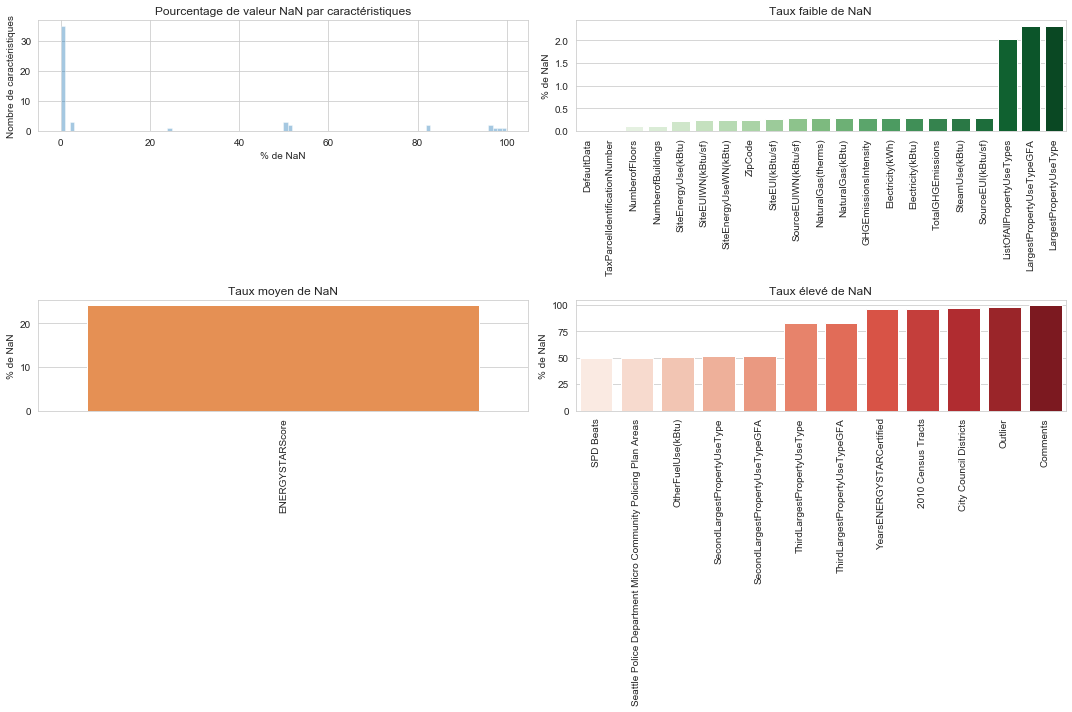

Caractéristiques sans valeurs manquantes : 
 ['State' 'OSEBuildingID' 'Neighborhood' 'PropertyGFABuilding(s)'
 'Longitude' 'PropertyGFAParking' 'Latitude' 'PropertyGFATotal'
 'PropertyName' 'PrimaryPropertyType' 'YearBuilt' 'Address' 'DataYear'
 'CouncilDistrictCode' 'ComplianceStatus' 'City' 'BuildingType']
Caractéristiques inutilisables : 
 []


In [17]:
missing_values_graph(missing_group)

In [18]:
cols_to_keep_from_high = missing_group['high_nans'][missing_group['high_nans'] < 98]
missing_group['high_nans'] = missing_group['high_nans'].drop(labels=cols_to_keep_from_high.index) 

In [19]:
data = data.drop(missing_group['high_nans'].index, axis=1)
data = data.drop(missing_group['useless_features'].index, axis=1)

In [20]:
data.head()

,2010 Census Tracts,Address,BuildingType,City,City Council Districts,ComplianceStatus,CouncilDistrictCode,DataYear,DefaultData,ENERGYSTARScore,...,SourceEUIWN(kBtu/sf),State,SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,YearsENERGYSTARCertified,ZipCode
0,NaN,405 OLIVE WAY,NonResidential,SEATTLE,NaN,Compliant,7,2015,No,65.0,...,175.1,WA,2023032.0,659000030,NaN,NaN,249.43,1927,NaN,98101
1,NaN,724 PINE ST,NonResidential,SEATTLE,NaN,Compliant,7,2015,No,51.0,...,195.2,WA,0.0,659000220,Restaurant,4622.0,263.51,1996,NaN,98101
2,NaN,1900 5TH AVE,NonResidential,SEATTLE,NaN,Compliant,7,2015,Yes,18.0,...,246.5,WA,19660404.0,659000475,Swimming Pool,0.0,2061.48,1969,NaN,98101
3,NaN,620 STEWART ST,NonResidential,SEATTLE,NaN,Compliant,7,2015,No,1.0,...,643.2,WA,23458518.0,659000640,NaN,NaN,1936.34,1926,NaN,98101
4,NaN,401 LENORA ST,NonResidential,SEATTLE,NaN,Compliant,7,2015,No,67.0,...,227.1,WA,0.0,659000970,Swimming Pool,0.0,507.70,1980,NaN,98121


### Suppressions de caractéristiques non pertinentes

Certaines caractéristiques ne vont pas influer sur l'émission de GES ou la consommation électrique, nous allons donc les supprimés.

In [21]:
col_to_remove = ["2010 Census Tracts", "CouncilDistrictCode", "City Council Districts", "SPD Beats", 
                 "Seattle Police Department Micro Community Policing Plan Areas", 
                 "TaxParcelIdentificationNumber", "Address", "City", "ComplianceStatus", "Latitude", "Longitude", 
                 "PropertyName", "State", "ZipCode"]
data = data.drop(col_to_remove, axis=1)

### Gestion des types

In [22]:
data.dtypes

BuildingType                        object
DataYear                             int64
DefaultData                         object
ENERGYSTARScore                    float64
Electricity(kBtu)                  float64
Electricity(kWh)                   float64
GHGEmissionsIntensity              float64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
ListOfAllPropertyUseTypes           object
NaturalGas(kBtu)                   float64
NaturalGas(therms)                 float64
Neighborhood                        object
NumberofBuildings                  float64
NumberofFloors                     float64
OSEBuildingID                        int64
OtherFuelUse(kBtu)                 float64
PrimaryPropertyType                 object
PropertyGFABuilding(s)               int64
PropertyGFAParking                   int64
PropertyGFATotal                     int64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
SiteEUI(kBt

In [23]:
data["NumberofBuildings"] = data["NumberofBuildings"].astype('Int64')
data["NumberofFloors"] = data['NumberofFloors'].astype('Int64')

In [24]:
data.dtypes

BuildingType                        object
DataYear                             int64
DefaultData                         object
ENERGYSTARScore                    float64
Electricity(kBtu)                  float64
Electricity(kWh)                   float64
GHGEmissionsIntensity              float64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
ListOfAllPropertyUseTypes           object
NaturalGas(kBtu)                   float64
NaturalGas(therms)                 float64
Neighborhood                        object
NumberofBuildings                    Int64
NumberofFloors                       Int64
OSEBuildingID                        int64
OtherFuelUse(kBtu)                 float64
PrimaryPropertyType                 object
PropertyGFABuilding(s)               int64
PropertyGFAParking                   int64
PropertyGFATotal                     int64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
SiteEUI(kBt

### Gestion des valeurs aberrantes

In [25]:
data.describe()

,DataYear,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissionsIntensity,LargestPropertyUseTypeGFA,NaturalGas(kBtu),NaturalGas(therms),NumberofBuildings,NumberofFloors,...,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt
count,6716.00000,5093.000000,6.697000e+03,6.697000e+03,6697.000000,6.560000e+03,6.697000e+03,6.697000e+03,6708.000000,6708.000000,...,6699.000000,6700.000000,6.701000e+03,6.700000e+03,6697.000000,6697.000000,6.697000e+03,1156.000000,6697.000000,6716.000000
mean,2015.50268,67.906342,3.591058e+06,1.052458e+06,1.081154,7.707936e+04,1.311223e+06,1.311223e+04,1.071407,4.695736,...,54.182341,57.308522,5.194673e+06,5.240110e+06,133.510303,138.356802,2.625076e+05,11262.497750,114.935638,1968.101549
std,0.50003,27.012124,1.248728e+07,3.659769e+06,1.734763,1.681617e+05,5.685627e+06,5.685626e+04,1.593505,5.476218,...,55.101657,56.390651,1.813648e+07,1.500896e+07,135.677195,135.302508,3.704221e+06,26287.655182,478.876573,33.020391
min,2015.00000,1.000000,-1.154170e+05,-3.382680e+04,-0.020000,5.656000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,-2.000000,-2.100000,0.000000e+00,0.000000,-0.800000,1900.000000
25%,2015.00000,52.000000,6.372730e+05,1.867660e+05,0.160000,2.501600e+04,0.000000e+00,0.000000e+00,1.000000,2.000000,...,27.600000,29.600000,9.200689e+05,9.818029e+05,74.000000,79.199997,0.000000e+00,2325.000000,9.450000,1948.000000
50%,2016.00000,75.000000,1.167735e+06,3.422434e+05,0.540000,3.953000e+04,3.051000e+05,3.051000e+03,1.000000,4.000000,...,38.000000,40.900000,1.791071e+06,1.926136e+06,95.600000,102.099998,0.000000e+00,5039.000000,33.180000,1974.000000
75%,2016.00000,90.000000,2.797320e+06,8.198140e+05,1.280000,7.417800e+04,1.149639e+06,1.149639e+04,1.000000,5.000000,...,60.200000,64.925001,4.135280e+06,4.377974e+06,143.900000,149.800000,0.000000e+00,10270.000000,91.530000,1996.000000
max,2016.00000,100.000000,6.570744e+08,1.925775e+08,34.090000,9.320156e+06,2.979090e+08,2.979090e+06,111.000000,99.000000,...,834.400024,834.400024,8.739237e+08,4.716139e+08,2620.000000,2620.000000,1.349435e+08,459748.000000,16870.980000,2015.000000


In [26]:
data_num = data.loc[:, (data.dtypes == float)]

In [27]:
data_num.describe()

,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissionsIntensity,LargestPropertyUseTypeGFA,NaturalGas(kBtu),NaturalGas(therms),OtherFuelUse(kBtu),SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions
count,5093.000000,6.697000e+03,6.697000e+03,6697.000000,6.560000e+03,6.697000e+03,6.697000e+03,3.330000e+03,3238.000000,6699.000000,6700.000000,6.701000e+03,6.700000e+03,6697.000000,6697.000000,6.697000e+03,1156.000000,6697.000000
mean,67.906342,3.591058e+06,1.052458e+06,1.081154,7.707936e+04,1.311223e+06,1.311223e+04,7.142301e+03,28074.100153,54.182341,57.308522,5.194673e+06,5.240110e+06,133.510303,138.356802,2.625076e+05,11262.497750,114.935638
std,27.012124,1.248728e+07,3.659769e+06,1.734763,1.681617e+05,5.685627e+06,5.685626e+04,1.962790e+05,53473.984688,55.101657,56.390651,1.813648e+07,1.500896e+07,135.677195,135.302508,3.704221e+06,26287.655182,478.876573
min,1.000000,-1.154170e+05,-3.382680e+04,-0.020000,5.656000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-2.000000,-2.100000,0.000000e+00,0.000000,-0.800000
25%,52.000000,6.372730e+05,1.867660e+05,0.160000,2.501600e+04,0.000000e+00,0.000000e+00,0.000000e+00,4993.000000,27.600000,29.600000,9.200689e+05,9.818029e+05,74.000000,79.199997,0.000000e+00,2325.000000,9.450000
50%,75.000000,1.167735e+06,3.422434e+05,0.540000,3.953000e+04,3.051000e+05,3.051000e+03,0.000000e+00,10631.000000,38.000000,40.900000,1.791071e+06,1.926136e+06,95.600000,102.099998,0.000000e+00,5039.000000,33.180000
75%,90.000000,2.797320e+06,8.198140e+05,1.280000,7.417800e+04,1.149639e+06,1.149639e+04,0.000000e+00,26462.000000,60.200000,64.925001,4.135280e+06,4.377974e+06,143.900000,149.800000,0.000000e+00,10270.000000,91.530000
max,100.000000,6.570744e+08,1.925775e+08,34.090000,9.320156e+06,2.979090e+08,2.979090e+06,8.269669e+06,686750.000000,834.400024,834.400024,8.739237e+08,4.716139e+08,2620.000000,2620.000000,1.349435e+08,459748.000000,16870.980000


In [28]:
for column in data_num.columns:
    mean = data_num[column].mean()
    std = data_num[column].std()
    limitMax = mean + 2 * std
    limitMin = mean - 2 * std
    for index in data_num[column].index:
        value = data_num.at[index, column]
        if value > limitMax or value < limitMin:
            data_num.at[index, column] = np.nan

In [29]:
data_num.describe()

,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissionsIntensity,LargestPropertyUseTypeGFA,NaturalGas(kBtu),NaturalGas(therms),OtherFuelUse(kBtu),SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions
count,4806.000000,6.579000e+03,6.579000e+03,6458.000000,6431.000000,6.625000e+03,6625.000000,3324.000000,3115.000000,6417.000000,6427.000000,6.585000e+03,6.553000e+03,6435.000000,6441.000000,6.654000e+03,1126.000000,6613.000000
mean,71.627133,2.558093e+06,7.497188e+05,0.834988,62037.001088,9.502081e+05,9502.082548,430.159747,19617.526580,45.127926,48.273425,3.705591e+06,3.685535e+06,112.868096,118.111085,6.825326e+04,8034.608792,79.046883
std,22.945195,3.887261e+06,1.139267e+06,0.929769,62448.198812,1.679531e+06,16795.308212,9587.011398,25077.716765,26.789398,28.520519,5.394193e+06,4.878543e+06,65.349775,66.225310,4.888528e+05,9902.905271,126.577267
min,14.000000,-1.154170e+05,-3.382680e+04,-0.020000,5656.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-2.000000,-2.100000,0.000000e+00,0.000000,-0.800000
25%,57.000000,6.323210e+05,1.853226e+05,0.160000,24917.000000,0.000000e+00,0.000000,0.000000,4757.000000,27.200001,29.200001,9.110888e+05,9.674328e+05,73.300000,78.500000,0.000000e+00,2207.750000,9.250000
50%,77.000000,1.139756e+06,3.340290e+05,0.500000,38682.000000,2.915150e+05,2915.150146,0.000000,10200.000000,36.900000,39.700000,1.748630e+06,1.864552e+06,93.700000,100.100000,0.000000e+00,4957.000000,32.360000
75%,91.000000,2.647780e+06,7.759875e+05,1.160000,69881.000000,1.107516e+06,11075.160160,0.000000,23641.000000,56.200000,60.700000,3.896148e+06,4.056816e+06,134.600003,140.300000,0.000000e+00,9630.000000,87.270000
max,100.000000,2.848302e+07,8.347549e+06,4.550000,411301.000000,1.262546e+07,126254.601600,337952.000000,135000.000000,163.399994,169.000000,4.139950e+07,3.474613e+07,403.000000,408.100000,7.413886e+06,59371.000000,1060.130000


### Transformation de variables catégorielles

In [30]:
data.columns

Index(['BuildingType', 'DataYear', 'DefaultData', 'ENERGYSTARScore',
       'Electricity(kBtu)', 'Electricity(kWh)', 'GHGEmissionsIntensity',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ListOfAllPropertyUseTypes', 'NaturalGas(kBtu)', 'NaturalGas(therms)',
       'Neighborhood', 'NumberofBuildings', 'NumberofFloors', 'OSEBuildingID',
       'OtherFuelUse(kBtu)', 'PrimaryPropertyType', 'PropertyGFABuilding(s)',
       'PropertyGFAParking', 'PropertyGFATotal',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SteamUse(kBtu)', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'TotalGHGEmissions', 'YearBuilt',
       'YearsENERGYSTARCertified'],
      dtype='object')

In [31]:
data.sample(5)

,BuildingType,DataYear,DefaultData,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissionsIntensity,LargestPropertyUseType,LargestPropertyUseTypeGFA,ListOfAllPropertyUseTypes,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,YearsENERGYSTARCertified
3588,NonResidential,2016,False,79.0,25307741.0,7.417274e+06,0.32,Office,424044.0,"Office, Parking",...,25307744.00,26144226.0,187.399994,193.600006,0.0,NaN,NaN,176.43,1979,NaN
3386,NonResidential,2016,False,14.0,5071973.0,1.486510e+06,0.60,Office,34947.0,"Office, Retail Store",...,5071974.00,5242479.5,398.700012,412.200012,0.0,NaN,NaN,35.36,1910,NaN
1945,NonResidential,2015,No,NaN,1814019.0,5.316360e+05,2.76,Restaurant,24514.0,"Office, Restaurant",...,3816695.00,3688427.0,193.400000,184.200000,0.0,NaN,NaN,119.01,1902,NaN
5967,Multifamily LR (1-4),2016,False,27.0,2001644.0,5.866482e+05,0.23,Multifamily Housing,53747.0,Multifamily Housing,...,2001643.75,2160313.5,116.900001,126.199997,0.0,NaN,NaN,13.95,1968,NaN
6526,Multifamily MR (5-9),2016,False,35.0,2123094.0,6.222434e+05,1.34,Multifamily Housing,60084.0,Multifamily Housing,...,3720750.75,3800515.0,138.899994,141.899994,0.0,NaN,NaN,99.65,2012,NaN


In [32]:
data["BuildingType"].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [33]:
data["BuildingType"][data["BuildingType"] == "Nonresidential WA"] = "NonResidential"
data["BuildingType"][data["BuildingType"] == "Nonresidential COS"] = "NonResidential"

In [34]:
data["BuildingType"].unique()

array(['NonResidential', 'Multifamily MR (5-9)', 'SPS-District K-12',
       'Multifamily LR (1-4)', 'Campus', 'Multifamily HR (10+)'],
      dtype=object)

In [35]:
data["Neighborhood"].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE', 'Central',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [36]:
data["Neighborhood"] = data["Neighborhood"].str.upper()
data["Neighborhood"][data["Neighborhood"] == "DELRIDGE NEIGHBORHOODS"] = "DELRIDGE"

In [37]:
data["Neighborhood"].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

In [38]:
types_columns = ["LargestPropertyUseType", "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType"]
property_types = pd.concat([data['LargestPropertyUseType'], data['SecondLargestPropertyUseType'], data['ThirdLargestPropertyUseType']]).dropna().unique()
for ptype in property_types:
    data['PType_'+ptype] = 0.0
    data['PType_'+ptype].astype(float)
data[data.columns[pd.Series(data.columns).str.startswith('PType_')]]

,PType_Hotel,PType_Police Station,PType_Other - Entertainment/Public Assembly,PType_Multifamily Housing,PType_Library,PType_Fitness Center/Health Club/Gym,PType_Social/Meeting Hall,PType_Courthouse,PType_Other,PType_K-12 School,...,PType_Pre-school/Daycare,PType_Prison/Incarceration,PType_Vocational School,PType_Swimming Pool,PType_Convenience Store without Gas Station,PType_Bar/Nightclub,PType_Food Sales,PType_Enclosed Mall,PType_Other - Technology/Science,PType_Fast Food Restaurant
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
for column in types_columns:
    for index in data[column].index:
            ptype = data.at[index, column]
            valueGFA = data.at[index, column + 'GFA']
            percent_type = round(valueGFA * 100 / data.at[index, "PropertyGFATotal"], 2)
            if pd.notna(ptype) & pd.notna(percent_type):
                data.at[index, "PType_" + ptype] = percent_type
data = data.drop(types_columns, axis=1)
data = data.drop(["LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA", "ListOfAllPropertyUseTypes"], axis=1)

In [40]:
data[data.columns[pd.Series(data.columns).str.startswith('PType_')]]

,PType_Hotel,PType_Police Station,PType_Other - Entertainment/Public Assembly,PType_Multifamily Housing,PType_Library,PType_Fitness Center/Health Club/Gym,PType_Social/Meeting Hall,PType_Courthouse,PType_Other,PType_K-12 School,...,PType_Pre-school/Daycare,PType_Prison/Incarceration,PType_Vocational School,PType_Swimming Pool,PType_Convenience Store without Gas Station,PType_Bar/Nightclub,PType_Food Sales,PType_Enclosed Mall,PType_Other - Technology/Science,PType_Fast Food Restaurant
0,100.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.99,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,78.72,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,102.97,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6712,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6713,0.00,0.0,0.0,0.0,0.0,42.37,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714,0.00,0.0,0.0,0.0,0.0,46.10,0.0,0.0,0.0,0.0,...,3.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
data[['OSEBuildingID', 'PType_Hotel']][data['PType_Hotel'] != 0]

,OSEBuildingID,PType_Hotel
0,1,100.00
1,2,80.99
2,3,78.72
3,5,100.00
4,8,102.97
...,...,...
6303,27673,50.54
6532,49737,40.06
6561,49802,96.58
6659,50035,110.29


In [42]:
data

,BuildingType,DataYear,DefaultData,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissionsIntensity,ListOfAllPropertyUseTypes,NaturalGas(kBtu),NaturalGas(therms),...,PType_Pre-school/Daycare,PType_Prison/Incarceration,PType_Vocational School,PType_Swimming Pool,PType_Convenience Store without Gas Station,PType_Bar/Nightclub,PType_Food Sales,PType_Enclosed Mall,PType_Other - Technology/Science,PType_Fast Food Restaurant
0,NonResidential,2015,No,65.0,3.686160e+06,1.080307e+06,2.64,Hotel,1.272388e+06,12724.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NonResidential,2015,No,51.0,3.905411e+06,1.144563e+06,2.38,"Hotel, Parking, Restaurant",4.448985e+06,44490.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NonResidential,2015,Yes,18.0,4.976244e+07,1.458393e+07,1.92,"Hotel, Parking, Swimming Pool",3.709900e+06,37099.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NonResidential,2015,No,1.0,2.769023e+06,8.115210e+05,31.38,Hotel,2.001894e+06,20019.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NonResidential,2015,No,67.0,6.066245e+06,1.777841e+06,4.02,"Hotel, Parking, Swimming Pool",8.763105e+06,87631.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,NonResidential,2016,True,46.0,5.242709e+05,1.536550e+05,1.70,Office,3.254750e+05,3254.750244,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6712,NonResidential,2016,False,NaN,3.965461e+05,1.162210e+05,2.01,Other - Recreation,5.537300e+05,5537.299805,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6713,NonResidential,2016,False,NaN,1.792159e+06,5.252517e+05,16.99,"Fitness Center/Health Club/Gym, Other - Recrea...",3.973739e+06,39737.390630,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714,NonResidential,2016,False,NaN,3.488702e+05,1.022480e+05,1.57,"Fitness Center/Health Club/Gym, Food Service, ...",3.706010e+05,3706.010010,...,3.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.preprocessing import LabelEncoder

# BuildingType
le_bt = LabelEncoder()
le_bt.fit(data["BuildingType"])
data["BuildingType"] = le_bt.transform(data["BuildingType"])

# Neighborhood
le_nh = LabelEncoder()
le_nh.fit(data["Neighborhood"])
data["Neighborhood"] = le_nh.transform(data["Neighborhood"])

In [41]:
data.sample(5)

,Address,BuildingType,City,ComplianceStatus,CouncilDistrictCode,DataYear,DefaultData,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),State,SteamUse(kBtu),TaxParcelIdentificationNumber,TotalGHGEmissions,YearBuilt,ZipCode
537,2440 6TH AVE S,4,SEATTLE,0,2,2015,No,10.0,5641086.0,1.653239e+06,...,6583940.0,6897136.0,144.5,147.100000,WA,0.0,7666203530,89.41,1951,98134
5721,731 Westlake Ave N,4,SEATTLE,0,7,2016,False,NaN,1537923.0,4.507396e+05,...,3537841.5,3711173.0,263.5,267.600006,WA,0.0,4088803510,116.94,1921,98109
1701,4421 GREENWOOD AVE N,2,SEATTLE,0,6,2015,No,68.0,665243.0,1.949640e+05,...,665216.0,735656.0,84.1,93.000000,WA,0.0,3110620000,4.64,1988,98103
1339,110 6TH AVE N,4,SEATTLE,0,7,2015,No,NaN,5625380.0,1.648636e+06,...,9049598.0,9544963.0,125.8,131.800000,WA,0.0,1991200695,221.09,2008,98109
1297,975 JOHN ST,3,SEATTLE,0,7,2015,No,100.0,1396747.0,4.093460e+05,...,2162760.0,2302389.0,71.2,75.700000,WA,0.0,1986200305,50.42,2013,98109


## Analyse exploratoire

### Analyse univarié

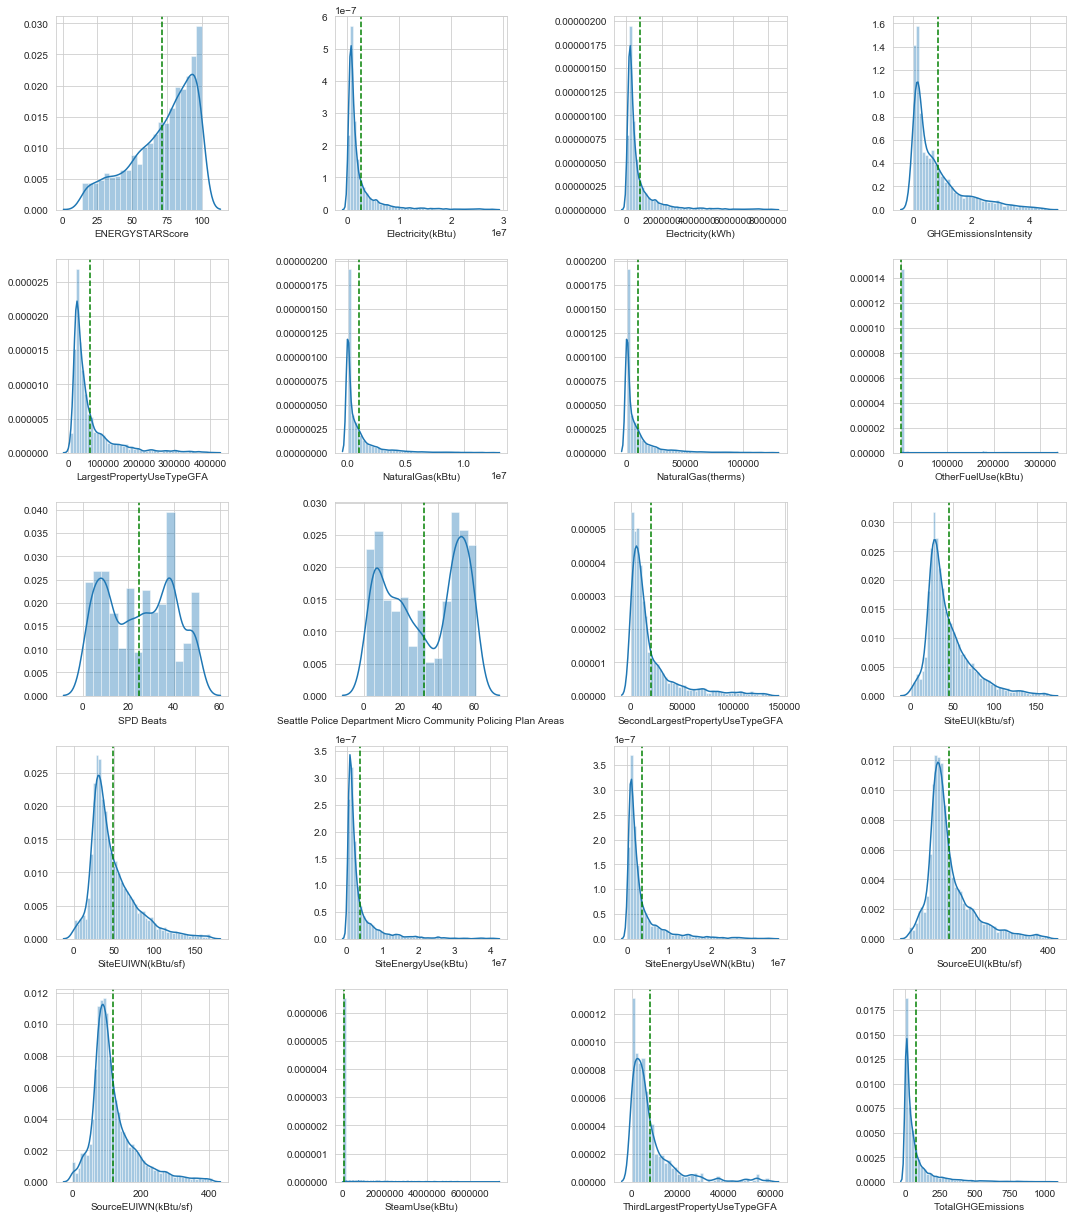

In [41]:
plt.figure(figsize=(15, 20))
for i in range(0, data_num.shape[1]):
    plt.subplot(6,4, i+1)
    df = data_num.iloc[:, i]
    sns.distplot(df.dropna())
    plt.axvline(df.mean(), c='g', ls='--')
plt.tight_layout()
plt.show()

In [42]:
skew = data_num.iloc[:].skew()
skew.name = "Asymétrie"
kurt = data_num.iloc[:].kurtosis()
kurt.name = 'Coef. aplatissement'
pd.concat([skew, kurt], axis=1)

,Asymétrie,Coef. aplatissement
ENERGYSTARScore,-0.757543,-0.405903
Electricity(kBtu),3.442396,13.908849
Electricity(kWh),3.442394,13.908831
GHGEmissionsIntensity,1.599681,2.099575
LargestPropertyUseTypeGFA,2.542224,7.225652
NaturalGas(kBtu),3.122066,11.869552
NaturalGas(therms),3.122066,11.869555
OtherFuelUse(kBtu),25.213524,700.301371
SPD Beats,0.034630,-1.295048
Seattle Police Department Micro Community Policing Plan Areas,-0.086149,-1.538672


In [43]:
def plot_pie(df):
    values = df.value_counts()
    plt.pie(values, labels=values.index, autopct="%.2f%%", radius=1)
    plt.title("Distribution de {}".format(df.name))
    plt.show()

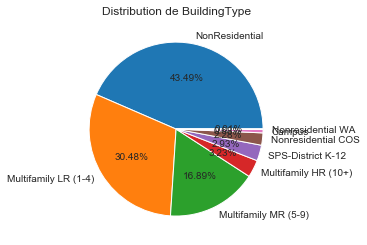

In [44]:
plot_pie(data['BuildingType'])

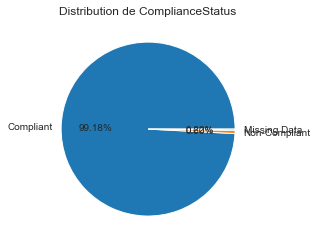

In [45]:
plot_pie(data['ComplianceStatus'])

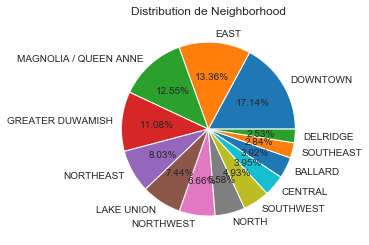

In [46]:
plot_pie(data['Neighborhood'])

### Analyse multi-variés

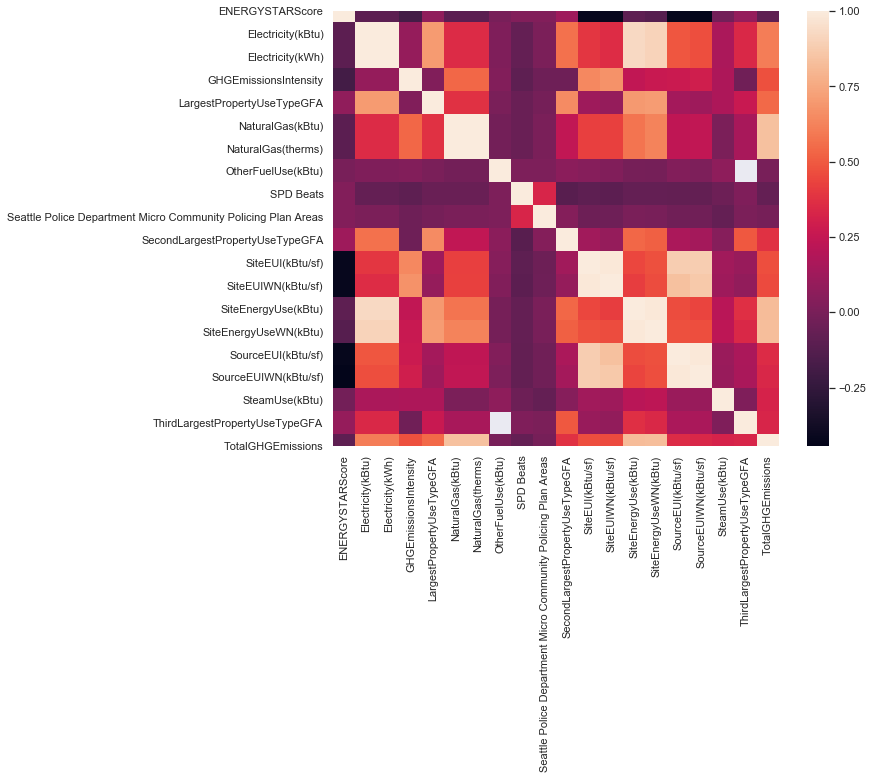

In [47]:
df = data_num
plt.figure(figsize=(10, 8))
sns.set()
sns.heatmap(df.corr())
plt.show()

In [48]:
def bivar_scatter(columns):
    plt.scatter(data[columns[0]], data[columns[1]], marker='.', alpha=0.1)
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.title("Coefficient de Pearson: %.2f"%data[columns].corr().iloc[0, 1])

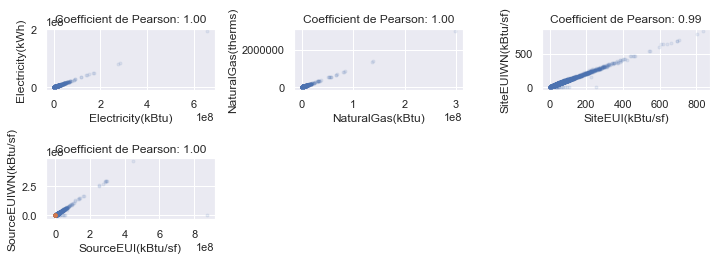

In [49]:
plt.subplots(figsize=(10, 5))

# Electricity(kBtu) & Electricity(kWh)
plt.subplot(3, 3, 1)
columns = ['Electricity(kBtu)', 'Electricity(kWh)']
bivar_scatter(columns)

# NaturalGas(kBtu) & NaturalGas(therms)
plt.subplot(3, 3, 2)
columns = ['NaturalGas(kBtu)', 'NaturalGas(therms)']
bivar_scatter(columns)

# SiteEUI(kBtu/sf) & SiteEUIWN(kBtu/sf)
plt.subplot(3, 3, 3)
columns = ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)']
bivar_scatter(columns)

# SiteEnergyUse(kBtu) & SiteEnergyUseWN(kBtu)
plt.subplot(3, 3, 4)
columns = ['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)']
bivar_scatter(columns)

# SourceEUI(kBtu/sf) & SourceEUIWN(kBtu/sf)
plt.subplot(3, 3, 4)
columns = ['SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)']
bivar_scatter(columns)

plt.tight_layout()
plt.show()

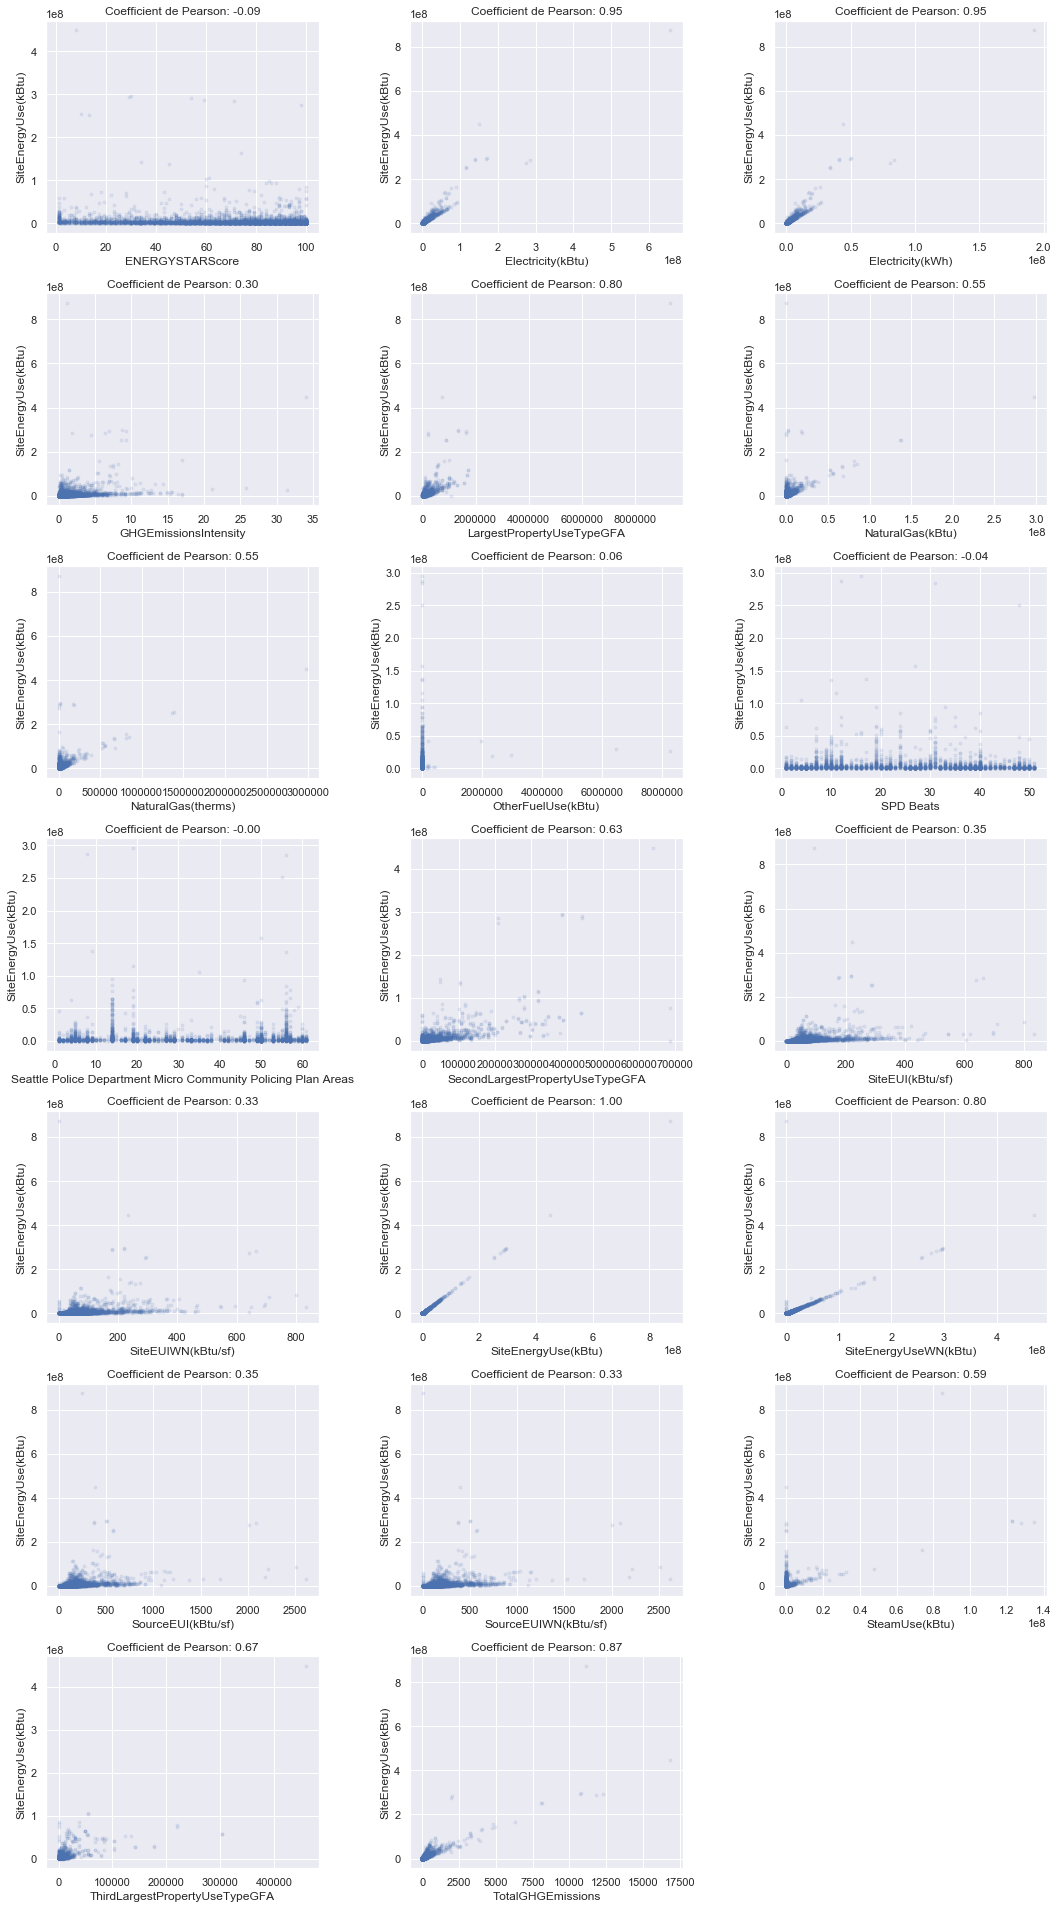

In [50]:
# SiteEnergyUse(kBtu) & other
plt.subplots(figsize=(15, 30))

for i in range(1, len(df.columns.values) + 1):
    columns = [df.columns.values[i-1], 'SiteEnergyUse(kBtu)']
    plt.subplot(8, 3, i)
    bivar_scatter(columns)
    
plt.tight_layout()
plt.show()

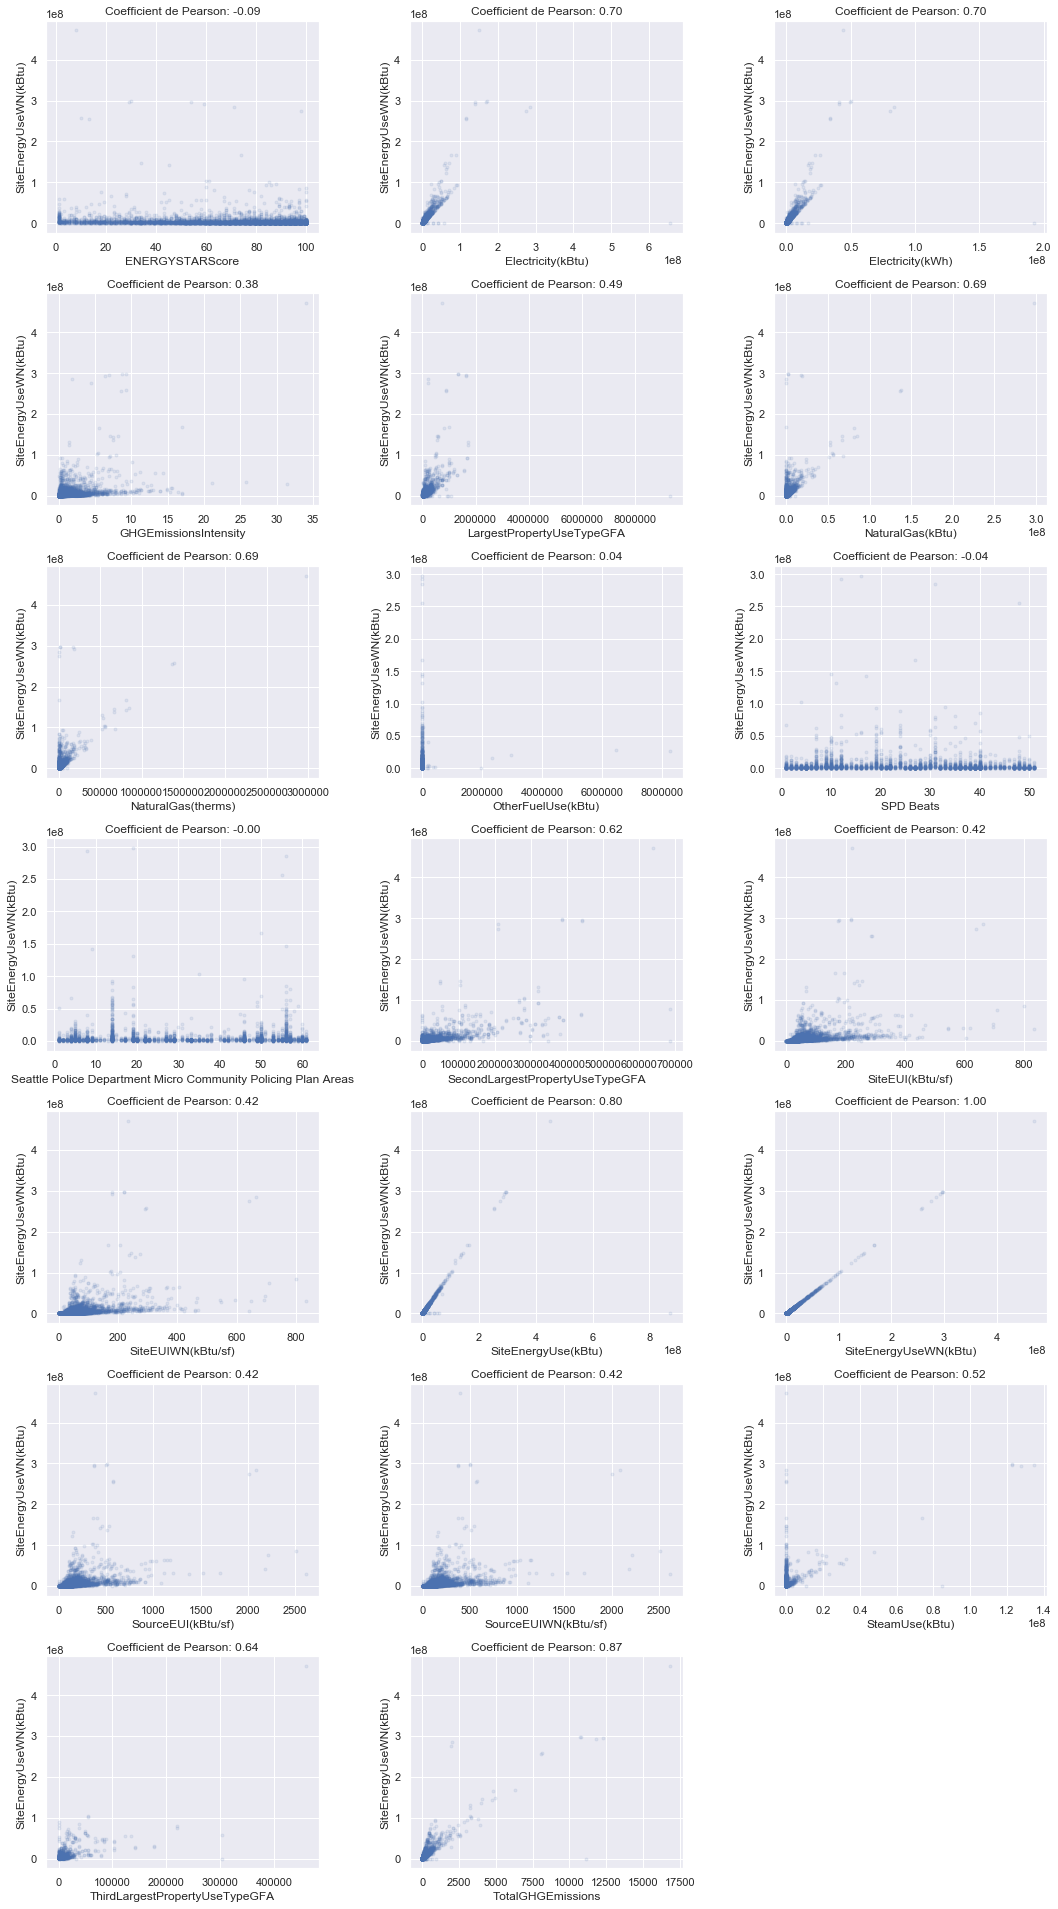

In [51]:
# SiteEnergyUseWN(kBtu) & other
plt.subplots(figsize=(15, 30))

for i in range(1, len(df.columns.values) + 1):
    columns = [df.columns.values[i-1], 'SiteEnergyUseWN(kBtu)']
    plt.subplot(8, 3, i)
    bivar_scatter(columns)
    
plt.tight_layout()
plt.show()

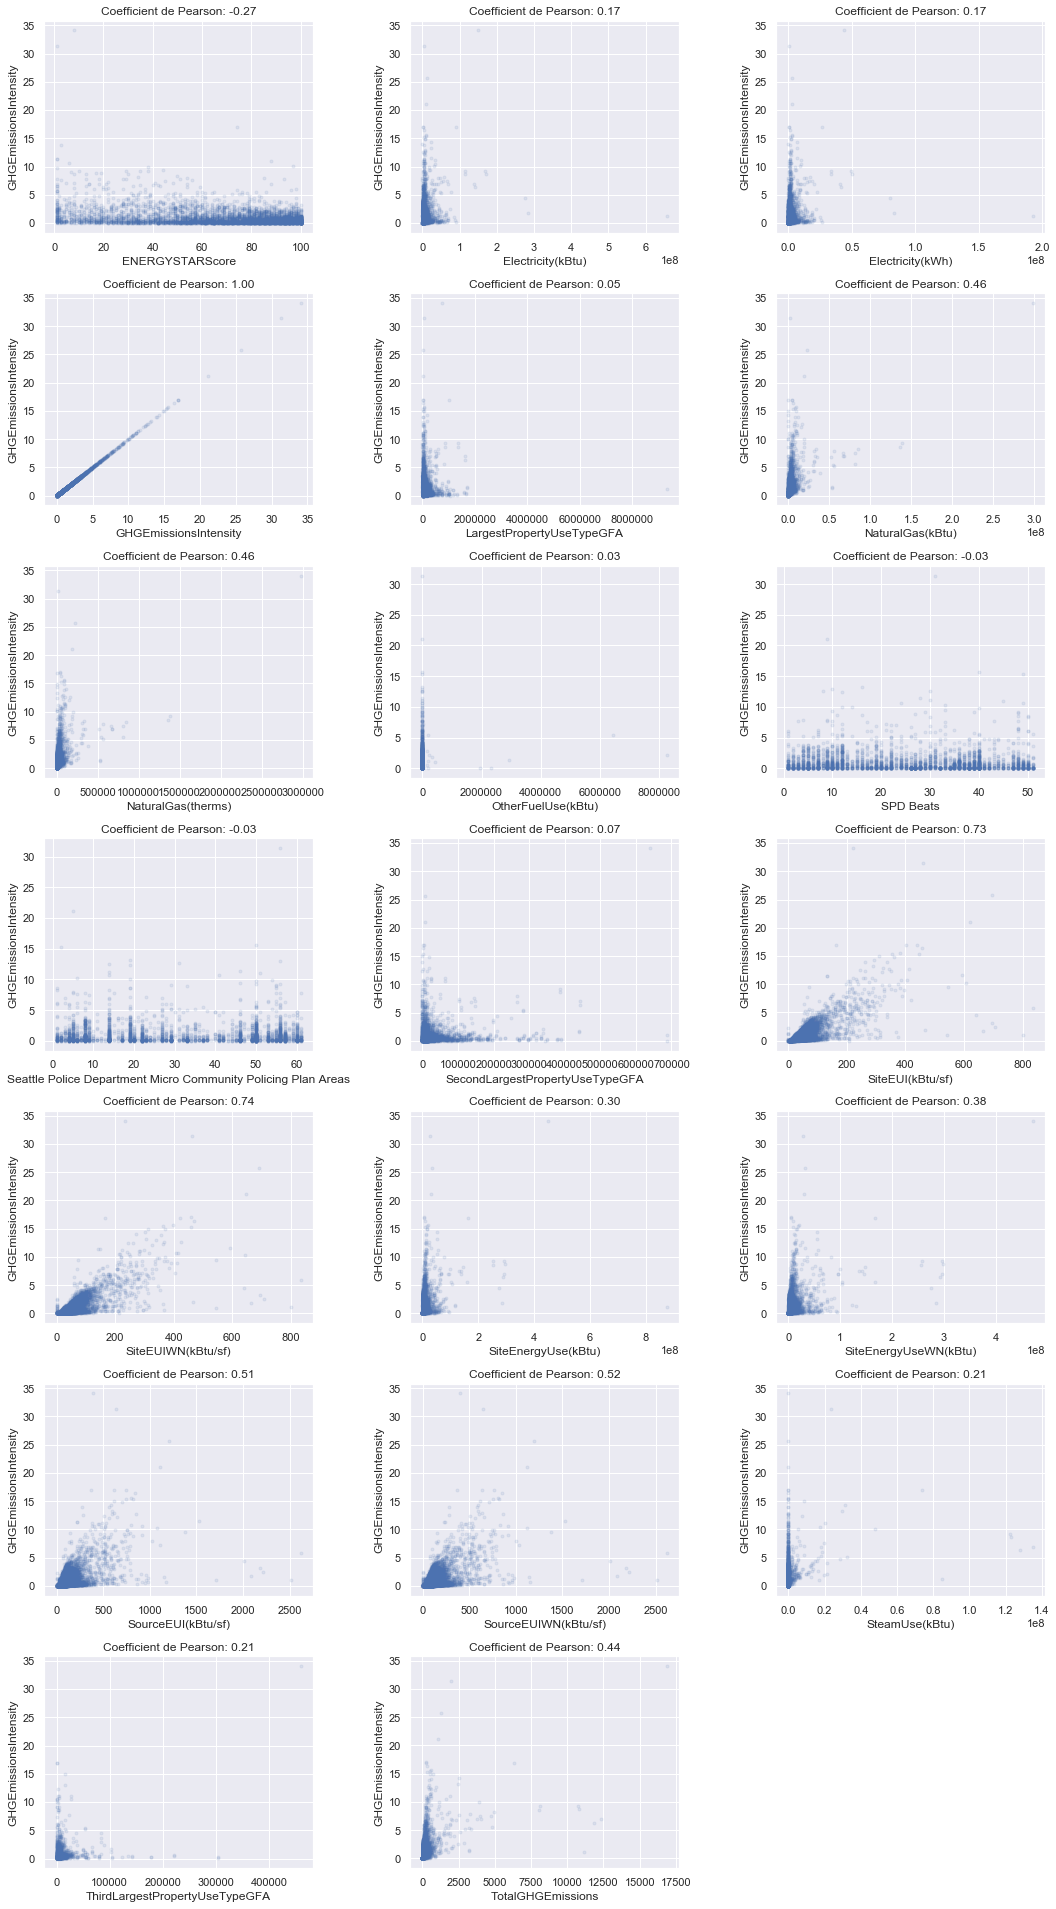

In [52]:
# GHGEmissionsIntensity & other
plt.subplots(figsize=(15, 30))

for i in range(1, len(df.columns.values) + 1):
    columns = [df.columns.values[i-1], 'GHGEmissionsIntensity']
    plt.subplot(8, 3, i)
    bivar_scatter(columns)
    
plt.tight_layout()
plt.show()

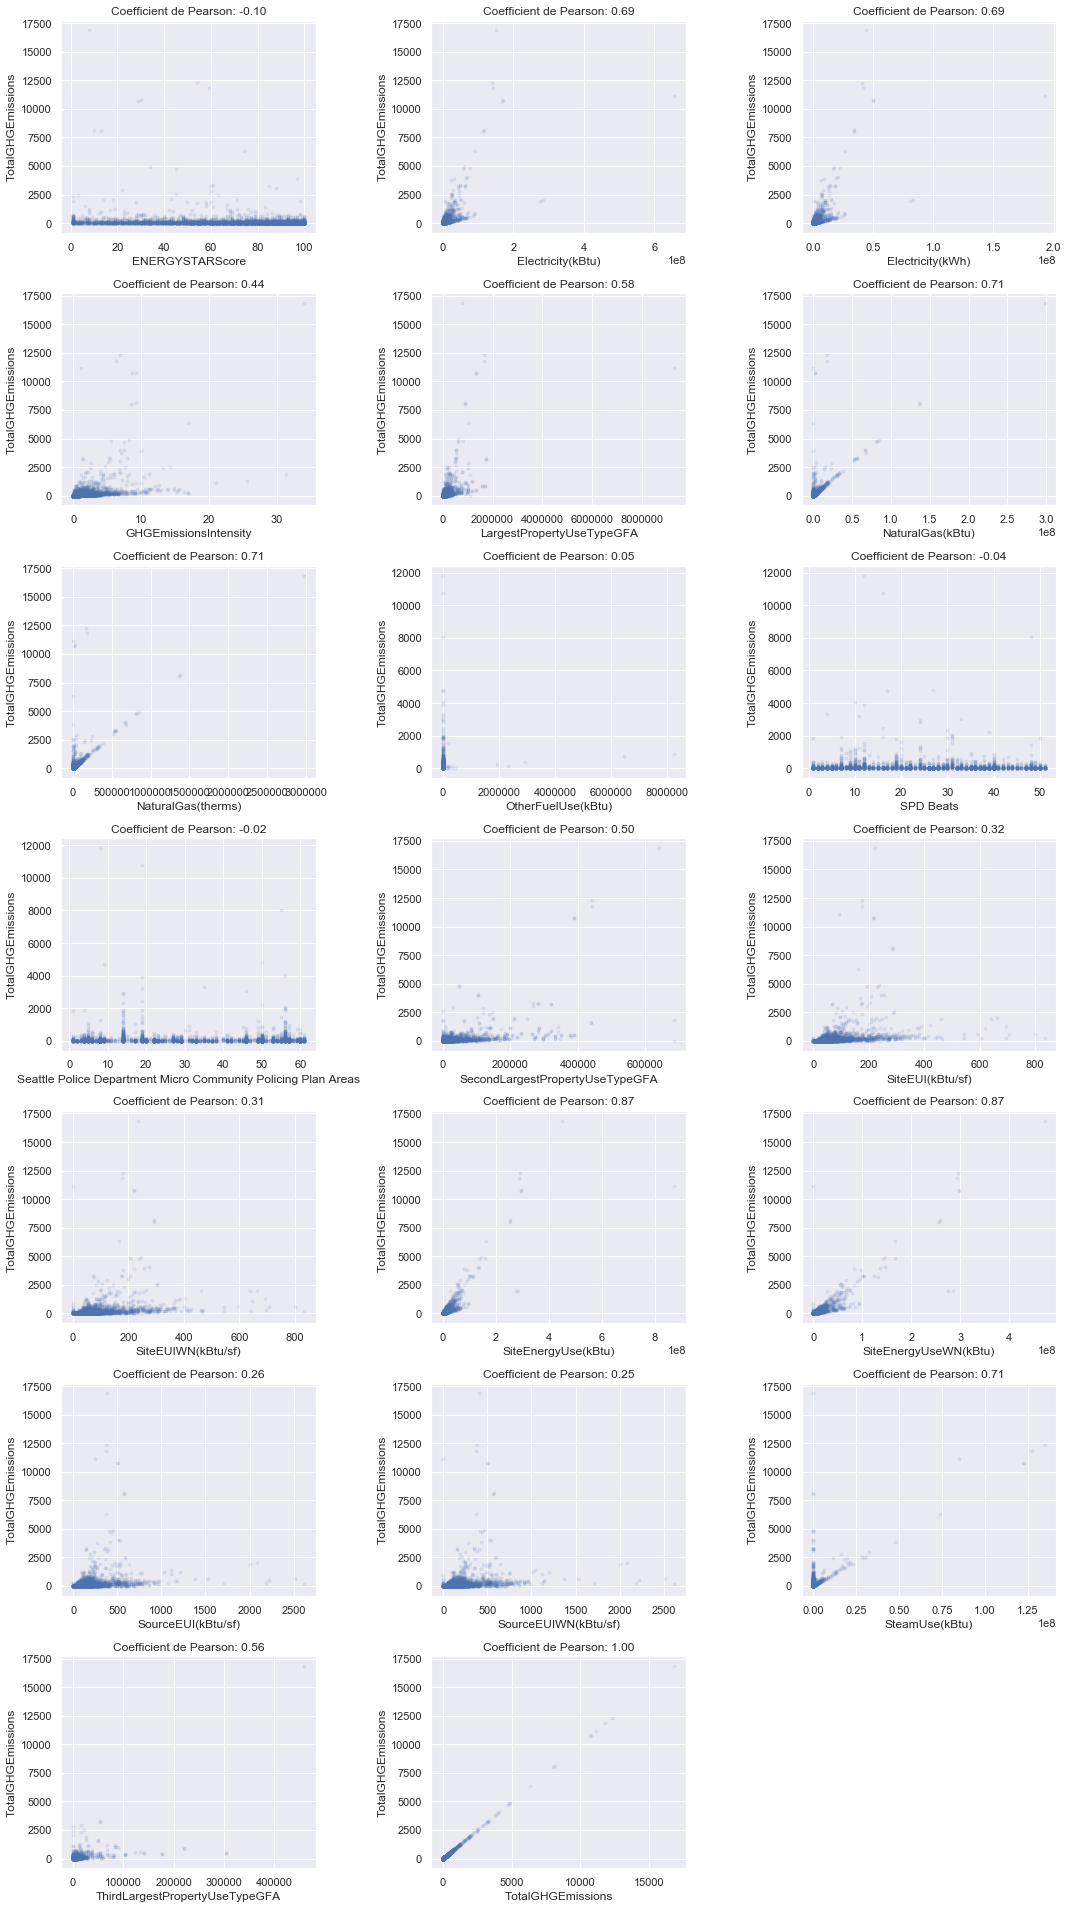

In [53]:
# TotalGHGEmissions & other
plt.subplots(figsize=(15, 30))

for i in range(1, len(df.columns.values) + 1):
    columns = [df.columns.values[i-1], 'TotalGHGEmissions']
    plt.subplot(8, 3, i)
    bivar_scatter(columns)
    
plt.tight_layout()
plt.show()

In [54]:
def plot_group(columnName, groupName, limMin, limMax):
    G = list(data[groupName].dropna().value_counts().index)
    df = data[[columnName, groupName]].dropna()[data[groupName].isin(G)]
    df_group = df.groupby(groupName).agg('mean').sort_values(columnName)
    G_order = list(df_group.index)
    df = data[[columnName, groupName]].dropna()[data[groupName].isin(G_order)]
    plt.figure(figsize=(15, 40))
    for i in range(1, len(G_order)+1):
        plt.subplot(26, 1, i)
        df2 = df[columnName][df[groupName]== G_order[i-1]]
        sns.distplot(df2, label=G_order[i-1], color=plt.cm.tab10(i/len(G_order)))
        plt.legend(loc="upper right", fontsize='large')
        plt.xlim([limMin, limMax])
    plt.tight_layout()
    plt.show()

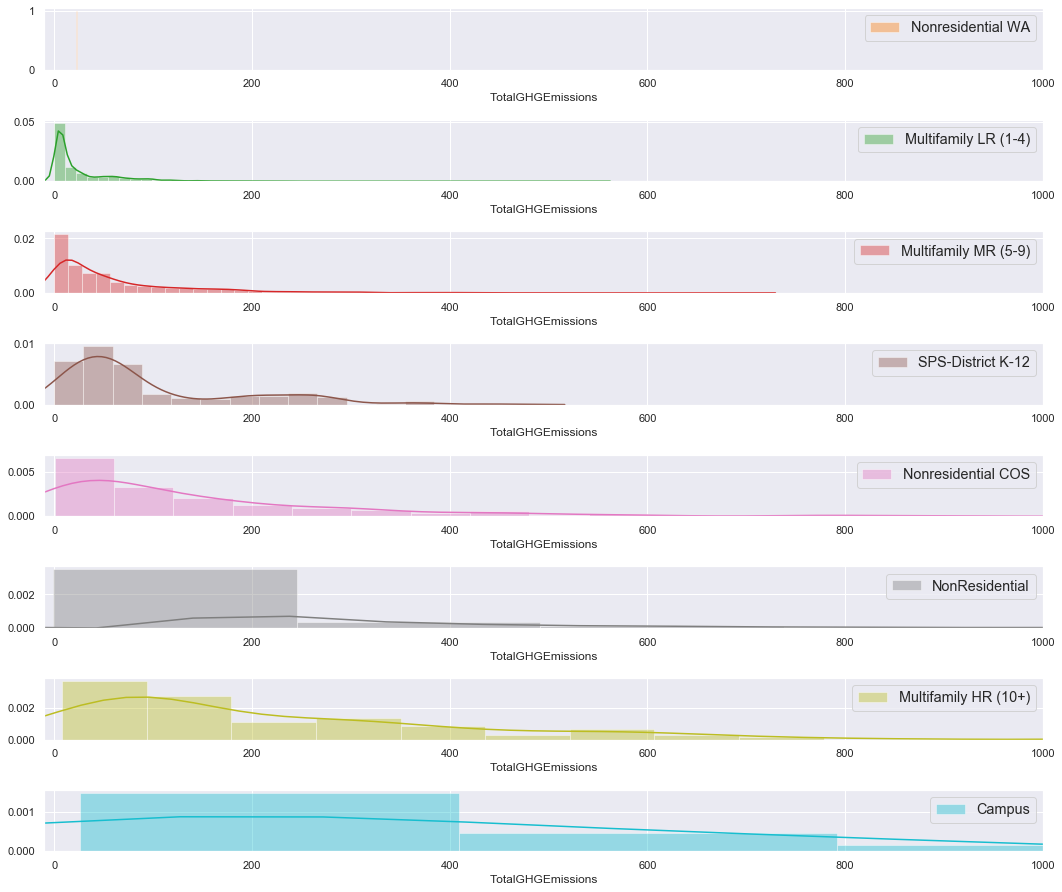

In [55]:
plot_group("TotalGHGEmissions", "BuildingType", -10, 1000)

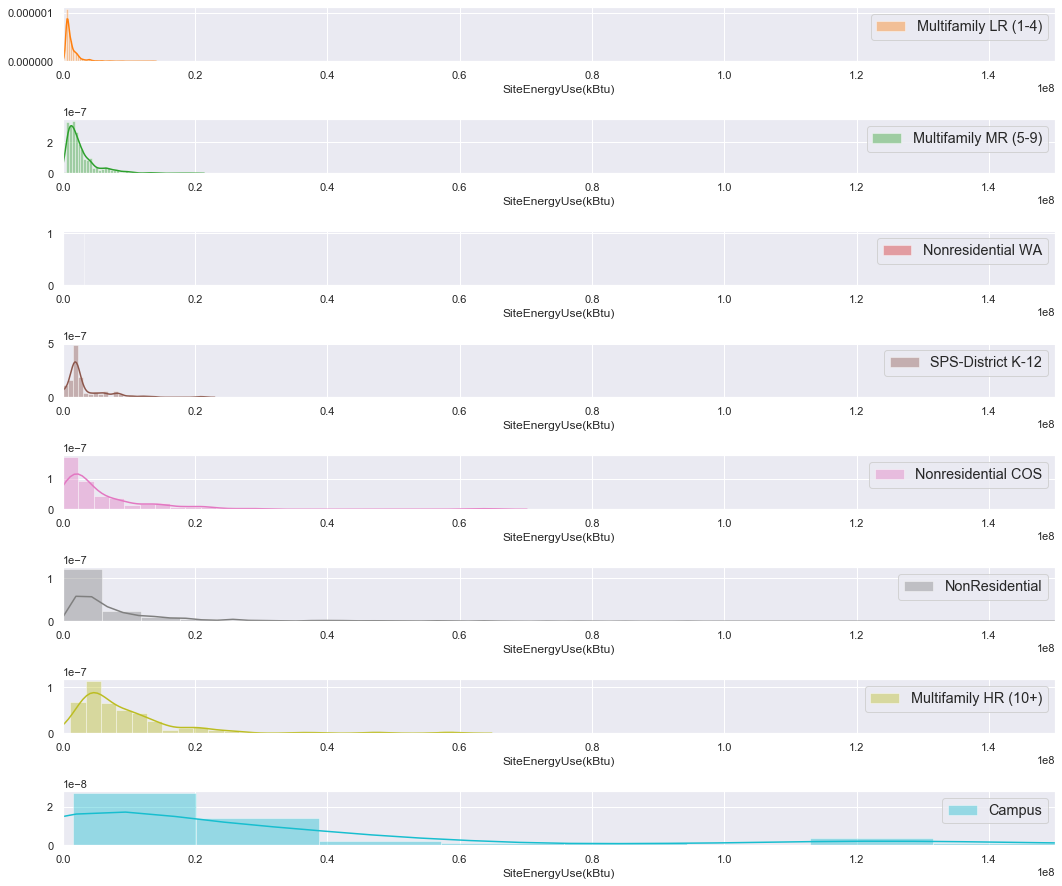

In [56]:
plot_group("SiteEnergyUse(kBtu)", "BuildingType", -10, 150000000)

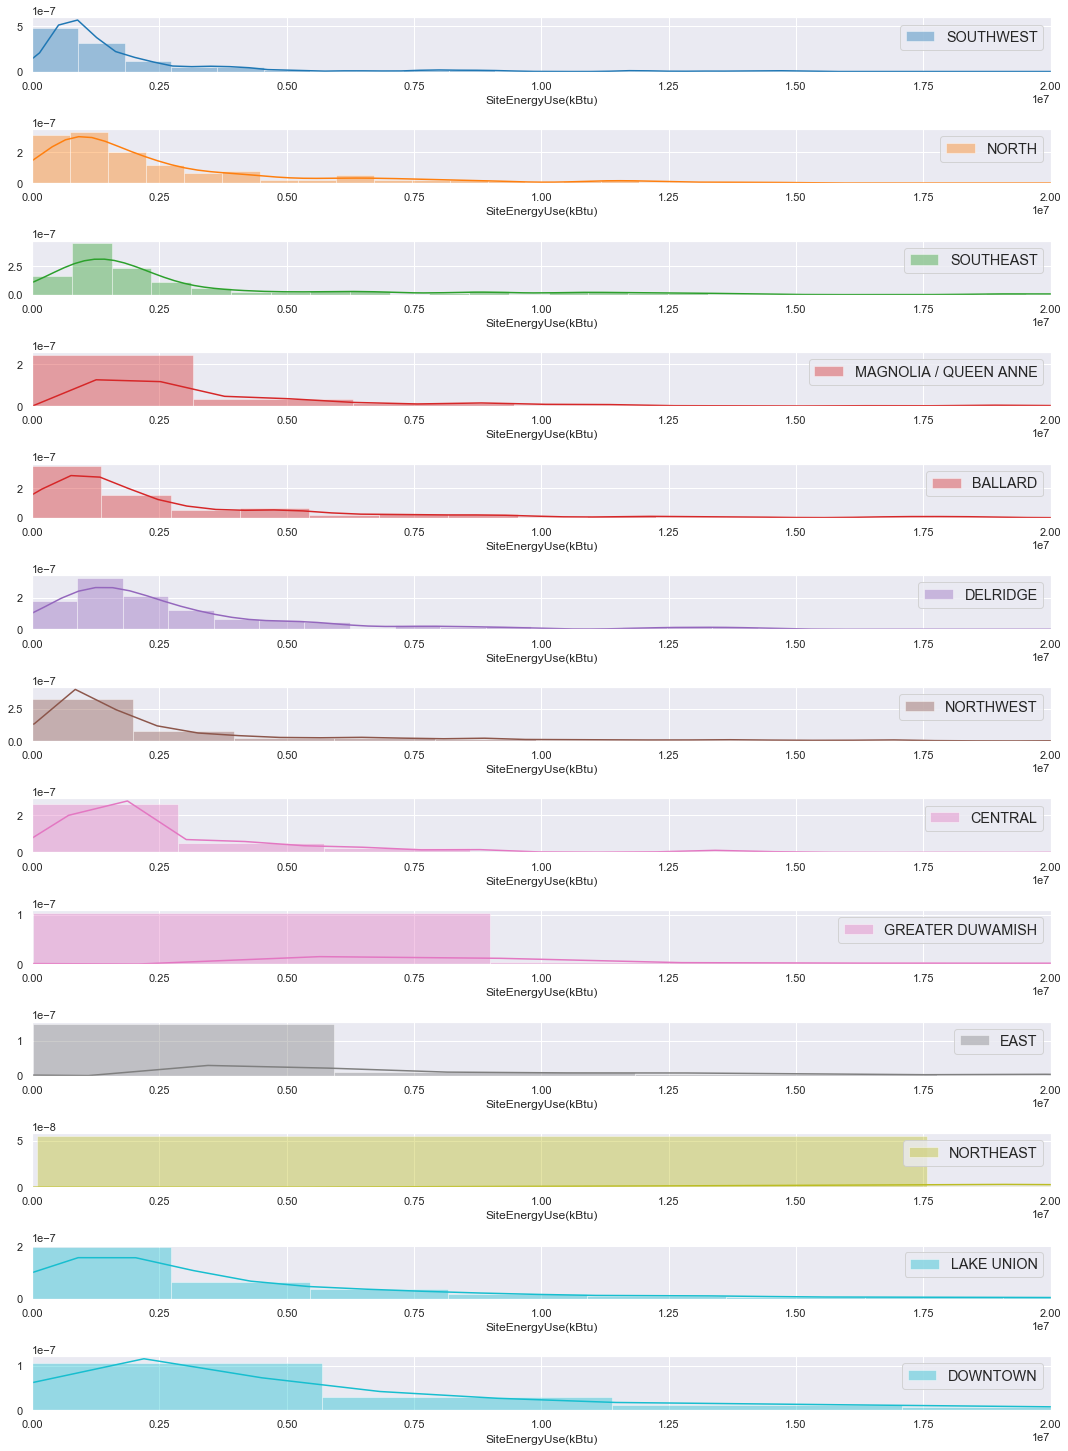

In [57]:
plot_group("SiteEnergyUse(kBtu)", "Neighborhood", -10, 20000000)